In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [16]:
df = pd.read_csv('../../experiments/test1PTC2021_06_17_13_20_33/summary/exp_summary.csv')


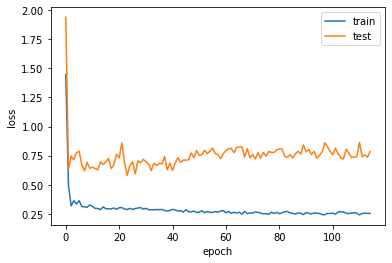

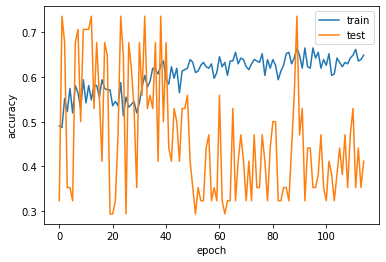

In [17]:
epochs = df["epoch"]
train_loss = df["train_loss"]
test_loss = df["test_loss"]
train_accuracy = df["train_accuracy"]
test_accuracy = df["test_accuracy"]

fig = plt.figure()
plt.plot(train_loss, label='train')
plt.plot(test_loss, label='test')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

fig = plt.figure()
plt.plot(train_accuracy, label='train')
plt.plot(test_accuracy, label='test')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()



In [28]:
df = pd.read_csv('../../experiments/test1PTC2021_06_17_15_56_55/summary/exp_summary.csv')


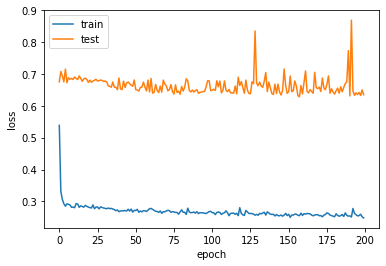

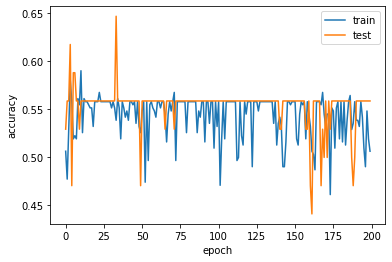

In [29]:
epochs = df["epoch"]
train_loss = df["train_loss"]
test_loss = df["test_loss"]
train_accuracy = df["train_accuracy"]
test_accuracy = df["test_accuracy"]

fig = plt.figure()
plt.plot(train_loss, label='train')
plt.plot(test_loss, label='test')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

fig = plt.figure()
plt.plot(train_accuracy, label='train')
plt.plot(test_accuracy, label='test')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()



In [58]:
df = pd.read_csv('../../experiments/test1PTC2021_06_18_08_17_56/summary/exp_summary.csv')


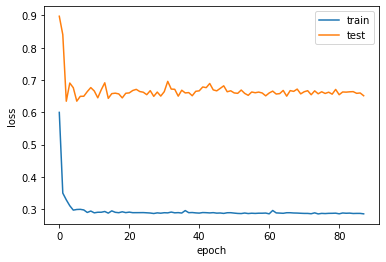

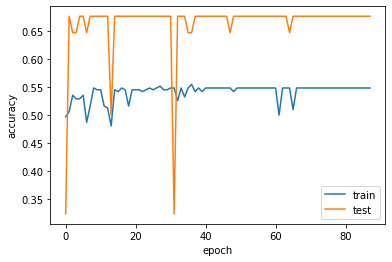

In [59]:
epochs = df["epoch"]
train_loss = df["train_loss"]
test_loss = df["test_loss"]
train_accuracy = df["train_accuracy"]
test_accuracy = df["test_accuracy"]

fig = plt.figure()
plt.plot(train_loss, label='train')
plt.plot(test_loss, label='test')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

fig = plt.figure()
plt.plot(train_accuracy, label='train')
plt.plot(test_accuracy, label='test')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()



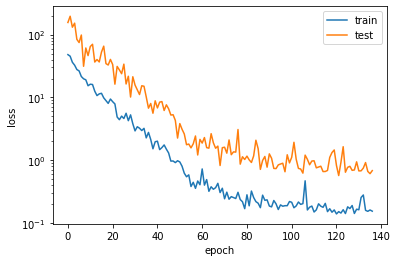

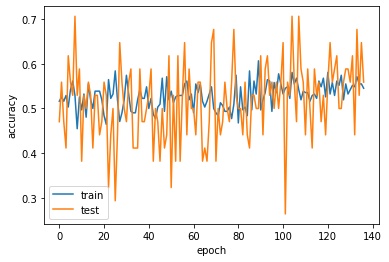

In [90]:
df = pd.read_csv('../../experiments/test1PTC2021_06_18_12_21_46/summary/exp_summary.csv')

epochs = df["epoch"]
train_loss = df["train_loss"]
test_loss = df["test_loss"]
train_accuracy = df["train_accuracy"]
test_accuracy = df["test_accuracy"]

fig = plt.figure()
plt.plot(train_loss, label='train')
plt.plot(test_loss, label='test')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.yscale('log')
plt.legend()
plt.show()

fig = plt.figure()
plt.plot(train_accuracy, label='train')
plt.plot(test_accuracy, label='test')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()



In [31]:
import torch

In [40]:
def get_mask(A, i, rep):
    indices = (A==1).nonzero(as_tuple=False)
    indices = indices[indices[:,1]==i]
    print(f'indices : {indices}')

    mask = torch.ones(A.shape)
    for index in indices:
        mask[index[0],index[1],index[2]] = 0
        mask[index[0],index[2],index[2]] = 0

    mask = torch.min(mask, torch.transpose(mask,-2,-1))
    mask = mask.bool()
    mask = torch.unsqueeze(mask, dim=1)

    if rep==1:
        mask = mask[:,:,i,:]
#         print(f'rep : {rep} - mask shape : {mask.shape}')

    degree = torch.unique(indices[:,0], return_counts=True)[1]
#         print(f'degree : {degree}')

    return mask, degree

In [52]:
A = torch.ones((1, 10,10))
A[0,4,:] = 0
A[0,:,4] = 0
mask, degree = get_mask(A, 1, 2)

indices : tensor([[0, 1, 0],
        [0, 1, 1],
        [0, 1, 2],
        [0, 1, 3],
        [0, 1, 5],
        [0, 1, 6],
        [0, 1, 7],
        [0, 1, 8],
        [0, 1, 9]])


In [53]:
print(mask)

tensor([[[[False, False,  True,  True,  True,  True,  True,  True,  True,  True],
          [False, False, False, False,  True, False, False, False, False, False],
          [ True, False, False,  True,  True,  True,  True,  True,  True,  True],
          [ True, False,  True, False,  True,  True,  True,  True,  True,  True],
          [ True,  True,  True,  True,  True,  True,  True,  True,  True,  True],
          [ True, False,  True,  True,  True, False,  True,  True,  True,  True],
          [ True, False,  True,  True,  True,  True, False,  True,  True,  True],
          [ True, False,  True,  True,  True,  True,  True, False,  True,  True],
          [ True, False,  True,  True,  True,  True,  True,  True, False,  True],
          [ True, False,  True,  True,  True,  True,  True,  True,  True, False]]]])
